## HOUSING PRICES- REGRESSION

In [49]:
#IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
#step1 import file
df=pd.read_excel('Housing.xlsx')

In [51]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(6), object(7)
memory usage: 55.5+ KB


In [53]:
#check the null values 
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## DATA PROSESSING & ENCODING DATA

In [54]:
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})

In [55]:
df1=pd.get_dummies(df['furnishingstatus'])

In [56]:
df = pd.concat([df,df1],axis=1)

In [57]:
df.drop(['furnishingstatus'],axis=1,inplace=True)

In [58]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,1,0,0
1,12250000.0,8960.0,4.0,4.0,4.0,1,0,0,0,1,3.0,0,1,0,0
2,12250000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,0,1,0
3,12215000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1,0,0
4,11410000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,0,0,1
541,1767150.0,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,0,1,0
542,1750000.0,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,0,0,1
543,1750000.0,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1,0,0


[]

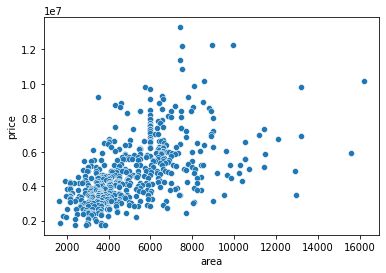

In [59]:
sns.scatterplot(data=df,x='area',y='price')
plt.plot()

[]

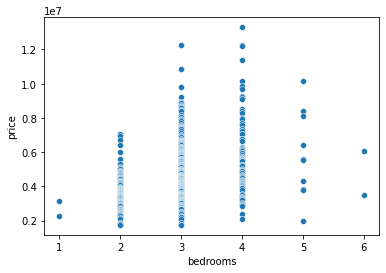

In [60]:
sns.scatterplot(data=df,x='bedrooms',y='price')
plt.plot()



In [61]:
y=df.pop('price')
x=df

In [62]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,1,0,0
1,8960.0,4.0,4.0,4.0,1,0,0,0,1,3.0,0,1,0,0
2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,0,1,0
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1,0,0
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,0,0,1
541,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,0,1,0
542,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,0,0,1
543,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1,0,0


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

In [65]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
46,6000.0,3.0,2.0,4.0,1,0,0,0,1,1.0,0,1,0,0
93,7200.0,3.0,2.0,1.0,1,0,1,0,1,3.0,0,0,1,0
335,3816.0,2.0,1.0,1.0,1,0,1,0,1,2.0,0,1,0,0
412,2610.0,3.0,1.0,2.0,1,0,1,0,0,0.0,1,0,0,1
471,3750.0,3.0,1.0,2.0,1,0,0,0,0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000.0,4.0,2.0,4.0,1,0,0,0,1,0.0,0,0,0,1
106,5450.0,4.0,2.0,1.0,1,0,1,0,1,0.0,1,0,1,0
270,4500.0,3.0,2.0,3.0,1,0,0,1,0,1.0,0,1,0,0
435,4040.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,0,0,1


## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
#instance of linear model
lr=LinearRegression()

In [68]:
#model training
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred=lr.predict(x_test)

In [70]:
y_pred

array([5164653.90033967, 7224722.29802167, 3109863.24240338,
       4612075.3272256 , 3294646.25725955, 3532275.09556558,
       5611774.56836476, 6368145.98732719, 2722856.95689985,
       2629405.61585782, 9617039.5031558 , 2798087.30447888,
       3171096.76847063, 3394639.09125528, 3681088.65424275,
       5263187.74621485, 3035963.47612385, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.2139565 ,
       5886993.57919884, 2730836.19518458, 4727316.47323635,
       5244847.527168  , 7555324.21605604, 3220790.84680268,
       5191898.79934207, 8143726.91009786, 3398814.09825035,
       6490693.05027925, 3315105.9074781 , 6708457.36761326,
       4201738.21071676, 3557571.06735185, 5836974.50478626,
       4808660.67448475, 4362878.73613261, 3191242.95701507,
       4596554.93225238, 4566042.86048411, 3517779.52374148,
       7205844.79365836, 3983597.27861103, 3749338.70271056,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397126,

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2=r2_score(y_test,y_pred)

In [73]:
r2

0.6529242642153186

## KNN REGRESSION

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#instance of a model
knn=KNeighborsClassifier()

In [28]:
#model training 
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
#preidict
y_pred=knn.predict(x_test)

In [30]:
y_pred

array([3500000., 3990000., 3290000., 4060000., 2275000., 2730000.,
       3773000., 4060000., 2380000., 2800000., 5250000., 3255000.,
       3010000., 3010000., 2275000., 2408000., 2240000., 4690000.,
       3500000., 4690000., 4200000., 2730000., 2345000., 3290000.,
       3773000., 5250000., 3010000., 2100000., 3500000., 2135000.,
       2653000., 2940000., 5775000., 5040000., 3360000., 3010000.,
       3010000., 2310000., 2660000., 3010000., 3087000., 2408000.,
       5383000., 3500000., 2730000., 3500000., 5775000., 3010000.,
       3087000., 2135000., 7420000., 2135000., 2450000., 3143000.,
       2345000., 2520000., 3780000., 1767150., 3990000., 3290000.,
       2310000., 3290000., 3990000., 2940000., 2870000., 3010000.,
       5040000., 2100000., 3773000., 3675000., 2520000., 4270000.,
       3773000., 5600000., 2800000., 3500000., 2408000., 3780000.,
       4690000., 2870000., 4270000., 3150000., 3920000., 4235000.,
       2240000., 3640000., 3010000., 3150000., 7420000., 63000

In [31]:
y_test

316    4060000.0
77     6650000.0
360    3710000.0
90     6440000.0
493    2800000.0
         ...    
15     9100000.0
357    3773000.0
39     7910000.0
54     7350000.0
155    5530000.0
Name: price, Length: 109, dtype: float64

In [32]:
from sklearn.metrics import accuracy_score , mean_squared_error

In [33]:
score=accuracy_score(y_test,y_pred)

In [34]:
score

0.009174311926605505

In [35]:
k_list=[x for x in range(1,15)]

In [36]:
error_train =[]
error_test =[]

In [37]:
for k in k_list:
    #instance of model
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #model training
    knn.fit(x_train,y_train)
    
    #predict train
    y_pred_train=knn.predict(x_train)
    
    #error train
    err=np.sqrt(mean_squared_error(y_train,y_pred_train))
    error_train.append(err)
    
    #predict test
    y_pred_test=knn.predict(x_test)
    
    #error test
    err=np.sqrt(mean_squared_error(y_test,y_pred_test))
    error_test.append(err)

In [38]:
error_test

[1970258.9317154705,
 2216798.5312581006,
 2305726.0122972988,
 2358839.7540038214,
 2276299.865310352,
 2297123.0159062925,
 2454549.2857300667,
 2470798.5307515906,
 2471087.0961792646,
 2519058.7757737515,
 2517430.640973072,
 2500924.739980368,
 2521178.989621011,
 2542616.423592622]

In [39]:
error_train

[94877.43179608196,
 1266360.0159114753,
 1595151.0291791447,
 1814548.9261611463,
 1870618.9162878294,
 1949010.9200093253,
 2013299.2892710036,
 1994088.9797009258,
 2011272.7358056027,
 2054482.968627342,
 2064205.1903378912,
 2030302.1167735676,
 2024203.564627786,
 2015590.9963939846]

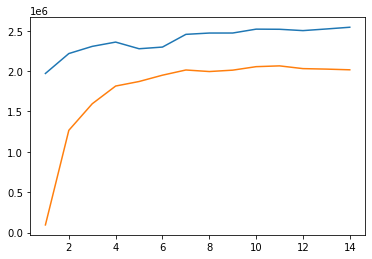

In [40]:
plt.plot(range(1,15),error_test)
plt.plot(range(1,15),error_train)
plt.show()

## Decision Tree

In [74]:
#decisiontree regression
from sklearn.tree import DecisionTreeRegressor

In [85]:
dr=DecisionTreeRegressor(max_depth=7)

In [86]:
dr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [87]:
y_pred=dr.predict(x_test)

In [88]:
r2=r2_score(y_test,y_pred)

In [89]:
print('accuracy:',r2)

accuracy: 0.47068980650150527
